In [87]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# db_uri = os.getenv("DATABASE_URI", "///../../data/data.sqlite")
db_uri = "sqlite:///../data/data.sqlite"
engine = create_engine(db_uri)

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# # Assign each table class to a variable
# data = Base.classes.Data

inspector = inspect(engine)
inspector.get_table_names()

# Create a session
session = Session(engine)

conn = engine.connect

In [93]:
gdp_per_cap = []
pop_density = []
rural_pop = []
perc_cultivated = []
hdi = []
gii = []

query = 'SELECT gdp_per_cap, pop_density, rural_pop, perc_cultivated, hdi, gii FROM Data'
results = session.connection().execute(query)

for result in results:
    gdp_per_cap.append(result[0])
    pop_density.append(result[1])
    rural_pop.append(result[2])
    perc_cultivated.append(result[3])
    hdi.append(result[4])
    gii.append(result[5])

In [94]:
df = pd.DataFrame({
    'gdp_per_cap': gdp_per_cap,
    'pop_density': pop_density,
    'rural_pop': rural_pop,
    'perc_cultivated': perc_cultivated,
    'hdi': hdi,
    'gii': gii
})

In [95]:
df.head()

,gdp_per_cap,gii,hdi,perc_cultivated,pop_density,rural_pop
0,NaN,NaN,NaN,11.93,27.62,14162.0
1,192.2,NaN,0.3343,11.88,32.91,16621.0
2,380.4,0.7430,NaN,12.12,39.64,19663.0
3,690.8,0.7200,0.4630,12.12,45.53,22131.0
4,590.3,0.6934,0.4653,12.12,49.82,23980.0


In [75]:
density_pearson = df.gdp_per_cap.corr(df.pop_density, method='pearson')
cultivated_pearson = df.gdp_per_cap.corr(df.perc_cultivated, method='pearson')
rural_pearson = df.gdp_per_cap.corr(df.rural_pop, method='pearson')

In [78]:
print('GDP correlation for population density: {}'.format(density_pearson))
print('GDP correlation for percent cultivated: {}'.format(cultivated_pearson))
print('GDP correlation for rural population: {}'.format(rural_pearson))

GDP correlation for population density: 0.14885459931225953
GDP correlation for percent cultivated: -0.10190683363236148
GDP correlation for rural population: -0.0802380294610905


In [83]:
df.gdp_per_cap.corr(df.hdi, method='pearson')

0.660944148209522

In [91]:
def draw_scatter(ax, x_data, y_data, xlabel, ylabel, title, fontsize=12):
     ax.scatter(x_data, y_data, s=20, c='#0077CC', marker='o', alpha=0.5)
     ax.set_xlabel(xlabel, fontsize=fontsize)
     ax.set_ylabel(ylabel, fontsize=fontsize)
     ax.set_title(title, fontsize=fontsize)

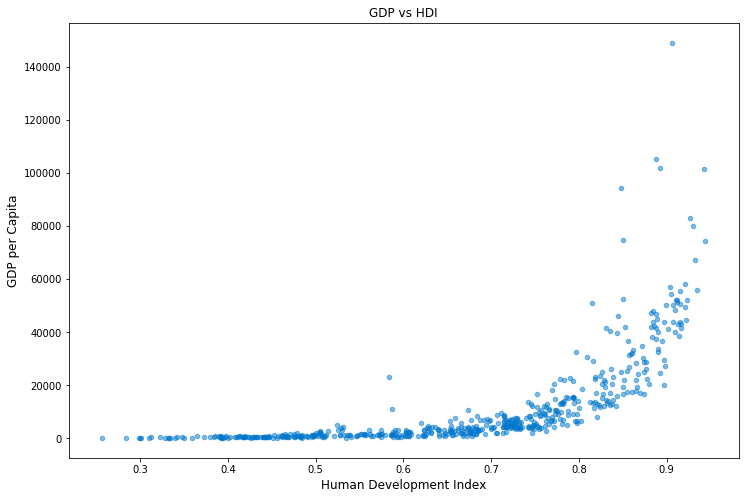

In [92]:
x_axis = df.hdi
y_axis = df.gdp_per_cap

fig, ax = plt.subplots(figsize=(12, 8))
draw_scatter(ax, x_axis, y_axis, 'Human Development Index', 'GDP per Capita', 'GDP vs HDI')

In [98]:
df.gdp_per_cap.corr(df.gii, method='pearson')

-0.6723783734143708

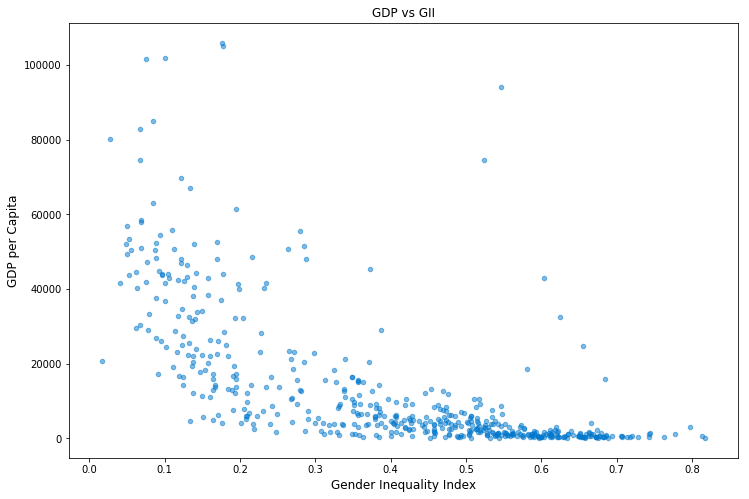

In [97]:
x_axis = df.gii
y_axis = df.gdp_per_cap

fig, ax = plt.subplots(figsize=(12, 8))
draw_scatter(ax, x_axis, y_axis, 'Gender Inequality Index', 'GDP per Capita', 'GDP vs GII')